# <a id='0'>Objective:</a>
- Clean up the dataset and explore 
- Start high and drill down: 
    + Qty by Category, Item, Year, Month, Day, time?
    + Gross Sales (Frequency) by Category, Item, Year, Month, Day, time?
- Create visual to break out by these features
- Group the items into buckets...too many items - Also lots of the items should probably eb grouped

**Need to create the scripts for:
- % of total for a column 
- rounding in python

In [1]:
# Note: This code was developed using Anaconda 4.5.3 with Python 3.6.5

# <a id='0'>O.S.E.M.N </a> 
- <a href='#1'>1. Obtain Data: Gather Data & Setup up environment</a>
- <a href='#2'>2. Scrub Data: Data Prep</a>
- <a href='#3'> 3. Explore data: EDA / Feature Engineering</a>
- <a href='#4'> 4. Model Data: Model Data for Prediction & Cross Validate</a>
- <a href='#4'> 5. iNterpret Data: Give Insights</a>

## <a id='1'>1. Obtain Data</a>

#### Import libraries & load dataset

In [3]:
import pandas as pd
import numpy as np
import os, sys

In [1]:
# Creating variables for the path of file
path = '/users/kevin8523/desktop/github/coffee_consulting/data/'
filename = 'All.txt'
filepath = f'{path}{filename}'

In [4]:
# Read in the data **NOTE: Need to set data types
df = pd.read_csv(filepath, sep='\t', header=0, 
                 dtype={'Gross Sales': np.float64, 
                        'Discounts': np.float64,
                        'Net Sales': np.float64,
                        'Tax': np.float64,},
                 encoding='latin-1', low_memory = False)

#### Quick Exploration of the data

In [111]:
# Shape of the data
print('\033[1m'+'DATASET','(ROWS, COLUMNS)'+'\033[0m')
print('df',df.shape)

DATASET (ROWS, COLUMNS)
df (447916, 28)


In [6]:
# df.head(), df.tail(),df.info(),df.describe()
df.head(2)

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Payment ID,Device Name,Notes,Details,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID
0,1/2/14,7:34:21,Central Time (US & Canada),1 Hot Drinks,Brew Coffee,1,16 oz,NaN,"Dark, To Go",2.39,...,DNYN5K3JNQXS3,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
1,1/2/14,7:49:27,Central Time (US & Canada),3 Bakery,Muffin Regular,1,Morning Glory,NaN,NaN,2.29,...,2F35P9MRY4YYJ,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN


## <a id='2'>2. Scrub Data</a>

#### Changing the Dtypes for the datetime columns


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format ='%H:%M:%S').dt.time

#### Missing Values

 - Need to look at missing data and if we need to do anything with it

In [14]:
# Selects the top n rows where Device Name is Null
df[df["Device Name"].isnull()].head(2)

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Payment ID,Device Name,Notes,Details,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID
7913,2/7/14,11:30:11,Central Time (US & Canada),6 Company Logo Merchandise,Gift Card - Over the Phone,1,$20,NaN,NaN,20.0,...,13fgmF1uKeqHSRnU0GB,NaN,"In the ""Notes to Seller"" box please include an...",https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
8992,2/12/14,12:18:11,Central Time (US & Canada),6 Company Logo Merchandise,Gift Card - Over the Phone,1,$20,NaN,NaN,20.0,...,vQ31A6uRjVu1ImFR0GB,NaN,"In the ""Notes to Seller"" box please include an...",https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN


#### Clean features

In [5]:
df.Category = df.Category.str.replace('\d+', '')
df.Category = df.Category.str.lstrip()
df.head(2)

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Payment ID,Device Name,Notes,Details,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID
0,1/2/14,7:34:21,Central Time (US & Canada),Hot Drinks,Brew Coffee,1,16 oz,NaN,"Dark, To Go",2.39,...,DNYN5K3JNQXS3,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
1,1/2/14,7:49:27,Central Time (US & Canada),Bakery,Muffin Regular,1,Morning Glory,NaN,NaN,2.29,...,2F35P9MRY4YYJ,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN


## <a id='3'>3. Explore Data</a>

Exploration / Questions to answer:
- What Category/Item makes the most profit
- What Category/Item sells the most items
- What % do each Category/Item make up for total sales or Qty Sold

Takeaways
- What is None category ==> Custom? Picky? Drink of the week?
- 2a in category is goes with 2, usually extra syrup or extra shot ==> Cost extra money

#### Data Exploration by Category

In [6]:
# Visualize data for exploration 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# Number of rows by Category ==> Group by Category and return rows
c = df
c.groupby([c.Category]).size()

Category
Bakery                       89693
Bulk Resale                   1775
Catering                       380
Coffee                         121
Cold Drinks                  50091
Company Logo Merchandise      3551
Events                          34
Food Outsourced              45491
Hot Drinks                  227256
Kitchen                      10049
New Retail                      43
None                          2344
Pick-Up / Online Orders        130
Shop Online                   2185
Unused Items                     2
Wholesale                       18
Wine/Beer                     2474
a Add-ins                    12279
dtype: int64

In [5]:
# What is the summary statistics by category for Gross Sales?
c = df
c.groupby([c.Category])["Gross Sales"].agg(['mean','min','max'])

,mean,min,max
Category,,,
1 Hot Drinks,3.593374,-11.60,57.00
10 Events,35.235294,8.00,100.00
11 New Retail,19.522791,4.99,149.70
12 Wholesale,58.611111,3.50,144.00
2 Cold Drinks,3.518292,-9.20,25.00
2a Add-ins,0.485579,-0.65,14.00
3 Bakery,2.259340,-8.55,75.00
4 Food Outsourced,3.284367,-15.00,37.00
5 Bulk Resale,13.703583,-12.00,68.00


In [7]:
# What was the total number of Qty Sold, Gross Sales, Discounts, 
# and Net Sales by Category?
c = df
total_cat = c.groupby([c.Category]).sum().sort_values(by = "Qty",
                                                  ascending = False)
total_cat

,Qty,SKU,Gross Sales,Discounts,Net Sales,Tax
Category,,,,,,
Hot Drinks,241482,0.0,816615.909999,-2952.77,813663.139999,67113.08
Bakery,103364,0.0,202646.940000,-816.07,201830.870000,16633.75
Cold Drinks,54052,0.0,176234.740000,-333.41,175901.330000,14512.07
Food Outsourced,53546,0.0,149409.120000,-409.87,148999.250000,12272.71
a Add-ins,12847,0.0,5962.430000,-16.85,5945.580000,467.71
Kitchen,10694,0.0,69349.250000,-301.91,69047.340000,5691.67
Company Logo Merchandise,4636,0.0,73077.260000,-547.71,72529.550000,2060.28
Wine/Beer,2837,0.0,14906.000000,-224.89,14681.110000,1211.46
None,2823,0.0,14206.890000,-142.94,14063.950000,795.93


In [8]:
# Net Sales per Qty, Qty % of Total, Gross Sales % of Total
total_cat["Net Sales per Qty"] = total_cat["Net Sales"] / total_cat.Qty
total_cat['Qty_pct'] = round(total_cat.Qty / total_cat.Qty.sum(),3)
total_cat['Gross_pct'] = round(total_cat["Gross Sales"] / 
                                total_cat["Gross Sales"].sum(),3)
total_cat

,Qty,SKU,Gross Sales,Discounts,Net Sales,Tax,Net Sales per Qty,Qty_pct,Gross_pct
Category,,,,,,,,,
Hot Drinks,241482,0.0,816615.909999,-2952.77,813663.139999,67113.08,3.369457,0.491,0.515
Bakery,103364,0.0,202646.940000,-816.07,201830.870000,16633.75,1.952622,0.210,0.128
Cold Drinks,54052,0.0,176234.740000,-333.41,175901.330000,14512.07,3.254298,0.110,0.111
Food Outsourced,53546,0.0,149409.120000,-409.87,148999.250000,12272.71,2.782640,0.109,0.094
a Add-ins,12847,0.0,5962.430000,-16.85,5945.580000,467.71,0.462799,0.026,0.004
Kitchen,10694,0.0,69349.250000,-301.91,69047.340000,5691.67,6.456643,0.022,0.044
Company Logo Merchandise,4636,0.0,73077.260000,-547.71,72529.550000,2060.28,15.644855,0.009,0.046
Wine/Beer,2837,0.0,14906.000000,-224.89,14681.110000,1211.46,5.174871,0.006,0.009
None,2823,0.0,14206.890000,-142.94,14063.950000,795.93,4.981916,0.006,0.009


In [9]:
# Order by Gross pct & Reset the index: Move the Category into a column
total_cat = total_cat.sort_values(by = "Gross_pct", ascending = False)
total_cat = total_cat.reset_index()
total_cat

,Category,Qty,SKU,Gross Sales,Discounts,Net Sales,Tax,Net Sales per Qty,Qty_pct,Gross_pct
0,Hot Drinks,241482,0.0,816615.909999,-2952.77,813663.139999,67113.08,3.369457,0.491,0.515
1,Bakery,103364,0.0,202646.940000,-816.07,201830.870000,16633.75,1.952622,0.210,0.128
2,Cold Drinks,54052,0.0,176234.740000,-333.41,175901.330000,14512.07,3.254298,0.110,0.111
3,Food Outsourced,53546,0.0,149409.120000,-409.87,148999.250000,12272.71,2.782640,0.109,0.094
4,Company Logo Merchandise,4636,0.0,73077.260000,-547.71,72529.550000,2060.28,15.644855,0.009,0.046
5,Kitchen,10694,0.0,69349.250000,-301.91,69047.340000,5691.67,6.456643,0.022,0.044
6,Bulk Resale,1898,0.0,24323.860000,-48.08,24275.780000,2002.93,12.790190,0.004,0.015
7,Shop Online,2464,0.0,23993.500000,-400.91,23592.590000,1931.91,9.574915,0.005,0.015
8,None,2823,0.0,14206.890000,-142.94,14063.950000,795.93,4.981916,0.006,0.009
9,Wine/Beer,2837,0.0,14906.000000,-224.89,14681.110000,1211.46,5.174871,0.006,0.009


In [10]:
list(total_cat.columns.values)

['Category',
 'Qty',
 'SKU',
 'Gross Sales',
 'Discounts',
 'Net Sales',
 'Tax',
 'Net Sales per Qty',
 'Qty_pct',
 'Gross_pct']

#### Visualize some plots for relationships

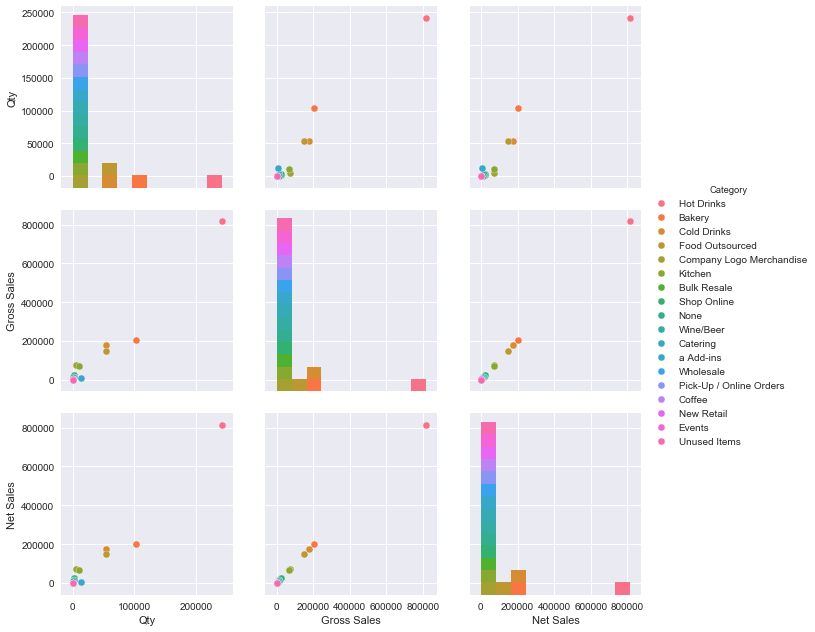

In [11]:
# Two across all features combination
sns.set()
cols = ['Category',
 'Qty',
 'Gross Sales',
 'Net Sales']
sns.pairplot(total_cat[cols], hue="Category", size=3
            )

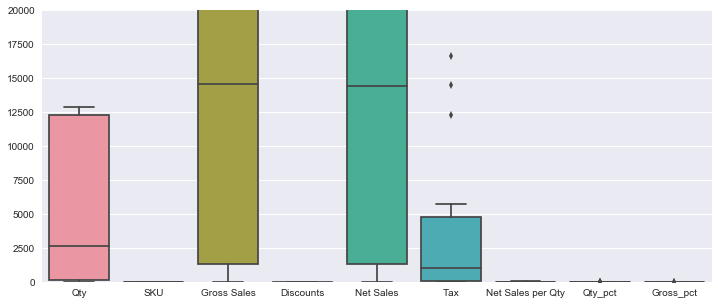

In [12]:
# Boxplot of dataset
plt.figure(figsize=(12,5))
plt.ylim(0, 20000)
sns.boxplot(data=total_cat)

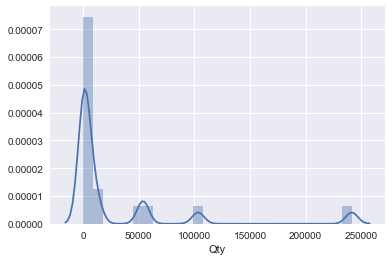

In [13]:
# Histogram of Qty sold
sns.distplot(total_cat.Qty)

In [14]:
# Reorder columns
list(total_cat.columns.values)
total_cat = total_cat[['Category',
 'Qty',
 'Qty_pct',
 'Gross Sales',
 'Gross_pct',
 'Discounts',
 'Net Sales',
 'Tax',
 'Net Sales per Qty']]

In [15]:
# Top n by % Gross of Total
total_cat.head(10).sort_values(by = "Gross_pct", ascending = False)

,Category,Qty,Qty_pct,Gross Sales,Gross_pct,Discounts,Net Sales,Tax,Net Sales per Qty
0,Hot Drinks,241482,0.491,816615.909999,0.515,-2952.77,813663.139999,67113.08,3.369457
1,Bakery,103364,0.210,202646.940000,0.128,-816.07,201830.870000,16633.75,1.952622
2,Cold Drinks,54052,0.110,176234.740000,0.111,-333.41,175901.330000,14512.07,3.254298
3,Food Outsourced,53546,0.109,149409.120000,0.094,-409.87,148999.250000,12272.71,2.782640
4,Company Logo Merchandise,4636,0.009,73077.260000,0.046,-547.71,72529.550000,2060.28,15.644855
5,Kitchen,10694,0.022,69349.250000,0.044,-301.91,69047.340000,5691.67,6.456643
6,Bulk Resale,1898,0.004,24323.860000,0.015,-48.08,24275.780000,2002.93,12.790190
7,Shop Online,2464,0.005,23993.500000,0.015,-400.91,23592.590000,1931.91,9.574915
8,None,2823,0.006,14206.890000,0.009,-142.94,14063.950000,795.93,4.981916
9,Wine/Beer,2837,0.006,14906.000000,0.009,-224.89,14681.110000,1211.46,5.174871


In [16]:
# Create Cumulative column for Pareto Chart
Cuml = np.cumsum(total_cat.Gross_pct)

In [17]:
# Visualize Data 
# import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [18]:
# Create visuals
# Creating trace1
trace1 = go.Bar(
                x = total_cat.Category,
                y = total_cat.Gross_pct,
                name = "Gross %", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
                text = total_cat.Category # hover over text
)

# Create trace2
trace2 = go.Scatter(
                    x = total_cat.Category,
                    y = Cuml,
                    mode = "lines+markers",
                    name = "Cumulative Gross %",
                    # text = total_cat.Category
)

# Layers of visual
data = [trace1 , trace2]

# Layout
layout = go.Layout(
                   title = 'Pareto Chart',
                   yaxis = dict(title = 'Pct (%)')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename = 'boxplot.html' ) #iplot for inline / plot for new html

#### Data Exploration by Item

In [19]:
# Number of rows by Item ==> Group by item and return rows
i = df
i.groupby([i.Item]).size().sort_values(ascending = False).head(25)

Item
Caffe Latte             66703
Brew Coffee             46790
Mocha                   25622
Bfast Taco              23985
Americano               18556
Cookie                  18553
Bread / Pound Cake      18182
Chai                    16408
Latte/Cappuccino        15619
Smoothie                12636
Sandwiches              12162
FrappÌ©                 11901
Iced Tea                11018
Croissant               10551
Cappuccino              10256
Tacos in the Morning    10007
Scone                    8948
Hot Chocolate            8444
Cold-brewed Coffee       7626
Muffins/Cupcakes         7418
Tea                      5851
Grab N Go                5032
Brownie                  3927
Syrup                    3742
Gluten Free              3498
dtype: int64

In [20]:
# What is the summary statistics by category by Gross Sales? 
# Price differences in items
i = df
i.groupby([i.Item])["Gross Sales"].agg(['mean','min','max']).head()

,mean,min,max
Item,,,
1 dozen black ballet slipper,18.0,18.0,18.0
1 dozen logo'd cookies,30.0,30.0,30.0
1 dozen pink toe shoes,18.0,18.0,18.0
10 Pounds Wholesale Coffee,90.0,90.0,90.0
8oz hot cups,10.0,10.0,10.0


In [21]:
# What was the total number of Qty Sold, Gross Sales, Discounts, 
# and Net Sales by Item?
i = df
total_item = i.groupby([i.Item]).sum().sort_values(by = "Qty",
                                                  ascending = False)
total_item

,Qty,SKU,Gross Sales,Discounts,Net Sales,Tax
Item,,,,,,
Caffe Latte,70558,0.0,283046.14,-552.21,282493.93,23280.88
Brew Coffee,50133,0.0,113253.31,-258.16,112995.15,9292.91
Bfast Taco,28248,0.0,87033.20,-185.76,86847.44,7151.19
Mocha,27048,0.0,117977.60,-232.79,117744.81,9693.76
Cookie,23270,0.0,29443.15,-235.31,29207.84,2381.91
Bread / Pound Cake,19943,0.0,41530.20,-110.71,41419.49,3422.96
Americano,19632,0.0,50220.76,-241.64,49979.12,4156.55
Chai,17169,0.0,68145.35,-166.01,67979.34,5600.69
Latte/Cappuccino,16499,0.0,67947.30,-1182.20,66765.10,5504.76


In [22]:
# Net Sales per Qty, Qty % of Total, Gross Sales % of Total
total_item["Net Sales per Qty"] = total_item["Net Sales"] / total_item.Qty
total_item['Qty_pct'] = round(total_item.Qty / total_item.Qty.sum(),3)
total_item['Gross_pct'] = round(total_item["Gross Sales"] / 
                                total_item["Gross Sales"].sum(),3)
total_item

,Qty,SKU,Gross Sales,Discounts,Net Sales,Tax,Net Sales per Qty,Qty_pct,Gross_pct
Item,,,,,,,,,
Caffe Latte,70558,0.0,283046.14,-552.21,282493.93,23280.88,4.003712,0.143,0.178
Brew Coffee,50133,0.0,113253.31,-258.16,112995.15,9292.91,2.253908,0.102,0.071
Bfast Taco,28248,0.0,87033.20,-185.76,86847.44,7151.19,3.074463,0.057,0.055
Mocha,27048,0.0,117977.60,-232.79,117744.81,9693.76,4.353180,0.055,0.074
Cookie,23270,0.0,29443.15,-235.31,29207.84,2381.91,1.255171,0.047,0.019
Bread / Pound Cake,19943,0.0,41530.20,-110.71,41419.49,3422.96,2.076894,0.041,0.026
Americano,19632,0.0,50220.76,-241.64,49979.12,4156.55,2.545799,0.040,0.032
Chai,17169,0.0,68145.35,-166.01,67979.34,5600.69,3.959423,0.035,0.043
Latte/Cappuccino,16499,0.0,67947.30,-1182.20,66765.10,5504.76,4.046615,0.034,0.043


In [23]:
# Reorder columns
list(total_item.columns.values)
total_item = total_item[['Qty',
 'Qty_pct',
 'Gross Sales',
 'Gross_pct',
 'Discounts',
 'Net Sales',
 'Tax',
 'Net Sales per Qty']]

In [25]:
# Top n by % Gross of Total
total_item.head(20).sort_values(by = "Gross_pct", ascending = False)

,Qty,Qty_pct,Gross Sales,Gross_pct,Discounts,Net Sales,Tax,Net Sales per Qty
Item,,,,,,,,
Caffe Latte,70558,0.143,283046.14,0.178,-552.21,282493.93,23280.88,4.003712
Mocha,27048,0.055,117977.60,0.074,-232.79,117744.81,9693.76,4.353180
Brew Coffee,50133,0.102,113253.31,0.071,-258.16,112995.15,9292.91,2.253908
Bfast Taco,28248,0.057,87033.20,0.055,-185.76,86847.44,7151.19,3.074463
Sandwiches,12936,0.026,80324.33,0.051,-339.79,79984.54,6596.49,6.183097
Chai,17169,0.035,68145.35,0.043,-166.01,67979.34,5600.69,3.959423
Latte/Cappuccino,16499,0.034,67947.30,0.043,-1182.20,66765.10,5504.76,4.046615
Smoothie,13517,0.027,55858.96,0.035,-115.89,55743.07,4589.80,4.123923
FrappÌ©,12767,0.026,53653.48,0.034,-67.64,53585.84,4414.83,4.197215


In [27]:
# Order by Gross pct & Reset the index: Move the Category into a column
total_item = total_item.sort_values(by = "Gross_pct", ascending = False)
total_item = total_item.reset_index()
total_item.head()

,index,Item,Qty,Qty_pct,Gross Sales,Gross_pct,Discounts,Net Sales,Tax,Net Sales per Qty
0,0,Caffe Latte,70558,0.143,283046.14,0.178,-552.21,282493.93,23280.88,4.003712
1,1,Mocha,27048,0.055,117977.60,0.074,-232.79,117744.81,9693.76,4.353180
2,2,Brew Coffee,50133,0.102,113253.31,0.071,-258.16,112995.15,9292.91,2.253908
3,3,Bfast Taco,28248,0.057,87033.20,0.055,-185.76,86847.44,7151.19,3.074463
4,4,Sandwiches,12936,0.026,80324.33,0.051,-339.79,79984.54,6596.49,6.183097


In [28]:
# Create Cumulative column for Pareto Chart
item_Cuml = np.cumsum(total_item.Gross_pct)

In [30]:
total_item.head(20)

,index,Item,Qty,Qty_pct,Gross Sales,Gross_pct,Discounts,Net Sales,Tax,Net Sales per Qty
0,0,Caffe Latte,70558,0.143,283046.14,0.178,-552.21,282493.93,23280.88,4.003712
1,1,Mocha,27048,0.055,117977.60,0.074,-232.79,117744.81,9693.76,4.353180
2,2,Brew Coffee,50133,0.102,113253.31,0.071,-258.16,112995.15,9292.91,2.253908
3,3,Bfast Taco,28248,0.057,87033.20,0.055,-185.76,86847.44,7151.19,3.074463
4,4,Sandwiches,12936,0.026,80324.33,0.051,-339.79,79984.54,6596.49,6.183097
5,5,Chai,17169,0.035,68145.35,0.043,-166.01,67979.34,5600.69,3.959423
6,6,Latte/Cappuccino,16499,0.034,67947.30,0.043,-1182.20,66765.10,5504.76,4.046615
7,7,Smoothie,13517,0.027,55858.96,0.035,-115.89,55743.07,4589.80,4.123923
8,8,FrappÌ©,12767,0.026,53653.48,0.034,-67.64,53585.84,4414.83,4.197215
9,9,Americano,19632,0.040,50220.76,0.032,-241.64,49979.12,4156.55,2.545799


In [29]:
# Create visuals
# Creating trace1
item_trace1 = go.Bar(
                x = total_item.Item,
                y = total_item.Gross_pct,
                name = "Gross %", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
                text = total_item.Item # hover over text
)

# Create trace2
item_trace2 = go.Scatter(
                    x = total_item.Item,
                    y = item_Cuml,
                    mode = "lines+markers",
                    name = "Cumulative Gross %",
                    # text = total_item.Item
)

# Layers of visual
data = [item_trace1 , item_trace2]

# Layout
layout = go.Layout(
                   title = 'Pareto Chart',
                   yaxis = dict(title = 'Pct (%)')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename = 'boxplot.html' ) #iplot for inline / plot for new html

### To do: Qty by Year, Month, Day, time?

#### Feature Engineer
Pandas doc: https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties


In [37]:
# Date Column
df['Year'] = df.Date.dt.year # Extracts year
df['Month'] = df.Date.dt.month # Extracts month
df['Week'] = df.Date.dt.week # Extracts week
df['Day'] = df.Date.dt.weekday_name # Extracts day

In [41]:
df.head(10)

,Date,Year,Month,Week,Day,Time,Time Zone,Category,Item,Qty,...,Payment ID,Device Name,Notes,Details,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID
0,2014-01-02,2014,1,1,Thursday,07:34:21,Central Time (US & Canada),Hot Drinks,Brew Coffee,1,...,DNYN5K3JNQXS3,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
1,2014-01-02,2014,1,1,Thursday,07:49:27,Central Time (US & Canada),Bakery,Muffin Regular,1,...,2F35P9MRY4YYJ,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
2,2014-01-02,2014,1,1,Thursday,07:49:27,Central Time (US & Canada),Hot Drinks,Caffe Latte,1,...,2F35P9MRY4YYJ,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
3,2014-01-02,2014,1,1,Thursday,07:53:53,Central Time (US & Canada),Hot Drinks,Brew Coffee,1,...,F4MSBGWRAY51Y,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
4,2014-01-02,2014,1,1,Thursday,07:58:11,Central Time (US & Canada),Hot Drinks,Brew Coffee,1,...,35VFTZN145T0K,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
5,2014-01-02,2014,1,1,Thursday,07:58:40,Central Time (US & Canada),Hot Drinks,Espresso.double,1,...,KoHaWZlnen65D52V1GB,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
6,2014-01-02,2014,1,1,Thursday,07:58:40,Central Time (US & Canada),a Add-ins,Shot,1,...,KoHaWZlnen65D52V1GB,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
7,2014-01-02,2014,1,1,Thursday,07:58:40,Central Time (US & Canada),Bakery,Scone,1,...,KoHaWZlnen65D52V1GB,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
8,2014-01-02,2014,1,1,Thursday,08:04:07,Central Time (US & Canada),Hot Drinks,Mocha,1,...,UltLGykfxFCgUqAP0GB,Vicky Ipad,"Espresso, milk, and chocolate.",https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN
9,2014-01-02,2014,1,1,Thursday,08:04:07,Central Time (US & Canada),Hot Drinks,Brew Coffee,1,...,UltLGykfxFCgUqAP0GB,Vicky Ipad,NaN,https://squareup.com/dashboard/sales/transacti...,Payment,Mazama Coffee Co,NaN,NaN,NaN,NaN


In [50]:
# Reorder columns
list(df.columns.values)
total_year = df[['Date',
 'Year',
 'Month',
 'Week',
 'Day',
 'Time',
 'Category',
 'Item',
 'Qty',
 'Price Point Name',
 'Modifiers Applied',
 'Gross Sales',
 # 'Discounts',
 'Net Sales',
 'Transaction ID',
 'Payment ID',
 'Device Name',
 'Notes',
 'Event Type']]

In [51]:
total_year.head(2)

,Date,Year,Month,Week,Day,Time,Category,Item,Qty,Price Point Name,Modifiers Applied,Gross Sales,Net Sales,Transaction ID,Payment ID,Device Name,Notes,Event Type
0,2014-01-02,2014,1,1,Thursday,07:34:21,Hot Drinks,Brew Coffee,1,16 oz,"Dark, To Go",2.39,2.39,be89580e-9ff5-4d9b-9f1e-92b90a7a9531,DNYN5K3JNQXS3,Vicky Ipad,NaN,Payment
1,2014-01-02,2014,1,1,Thursday,07:49:27,Bakery,Muffin Regular,1,Morning Glory,NaN,2.29,2.29,4ea5779b-02aa-43bb-8ef0-b53413105997,2F35P9MRY4YYJ,Vicky Ipad,NaN,Payment


#### Data Exploration by Year

In [ ]:
# Group by Year/month/day to see qty sales and gross sales

### To do: Qty by Year, Month, Day, time?